In [2]:
#importing Keras  and other libraries

import time
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/home/sourab/anaconda3/envs/tf/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)


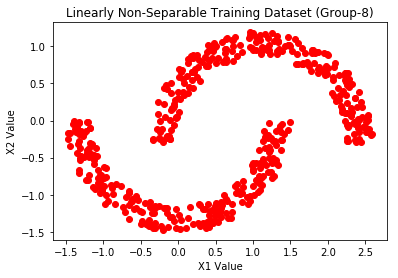

In [4]:
#Data Loading and Preprocessing 

x_train = []
y_train = []
x_valid = []
y_valid = []
x_test = []
y_test = []

with open('./group8/class1_train.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_train.append([float(a), float(b)])
        y_train.append(0)

with open('./group8/class2_train.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_train.append([float(a), float(b)])
        y_train.append(1)
        


with open('./group8/class1_val.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_valid.append([float(a), float(b)])
        y_valid.append(0)

with open('./group8/class2_val.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_valid.append([float(a), float(b)])
        y_valid.append(1)
    
        
        
with open('./group8/class1_test.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_test.append([float(a), float(b)])
        y_test.append(0)

with open('./group8/class2_test.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_test.append([float(a), float(b)])
        y_test.append(1)

        

x_train = np.array(x_train)
y_train = np.array(y_train)
y_train_vec = np_utils.to_categorical(y_train, 2)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
y_valid_vec = np_utils.to_categorical(y_valid, 2)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_test_vec = np_utils.to_categorical(y_test, 2)

plt.plot(x_train[:,0], x_train[:,1], 'ro')
plt.xlabel('X1 Value')
plt.ylabel('X2 Value')
plt.title('Linearly Non-Separable Training Dataset (Group-8)')
plt.show()

In [12]:
def init_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=2))
    #model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    sgd = SGD()
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return model

In [13]:
model = init_model()
history = LossHistory()
model.fit(x_train, y_train_vec,epochs=300,batch_size=128,callbacks=[history],validation_data=(x_valid, y_valid_vec), verbose=2)
score = model.evaluate(x_test, y_test_vec, batch_size=128)
print("Network's test score [loss, accuracy]: {0}".format(score))

Train on 500 samples, validate on 300 samples
Epoch 1/300
 - 0s - loss: 0.5127 - acc: 0.8120 - val_loss: 0.2831 - val_acc: 0.9300
Epoch 2/300
 - 0s - loss: 0.2648 - acc: 0.9260 - val_loss: 0.1836 - val_acc: 0.9433
Epoch 3/300
 - 0s - loss: 0.1930 - acc: 0.9280 - val_loss: 0.1433 - val_acc: 0.9567
Epoch 4/300
 - 0s - loss: 0.1602 - acc: 0.9400 - val_loss: 0.1171 - val_acc: 0.9633
Epoch 5/300
 - 0s - loss: 0.1392 - acc: 0.9360 - val_loss: 0.1032 - val_acc: 0.9667
Epoch 6/300
 - 0s - loss: 0.1301 - acc: 0.9380 - val_loss: 0.0927 - val_acc: 0.9733
Epoch 7/300
 - 0s - loss: 0.1151 - acc: 0.9500 - val_loss: 0.0827 - val_acc: 0.9700
Epoch 8/300
 - 0s - loss: 0.1155 - acc: 0.9420 - val_loss: 0.0818 - val_acc: 0.9600
Epoch 9/300
 - 0s - loss: 0.0990 - acc: 0.9480 - val_loss: 0.0795 - val_acc: 0.9633
Epoch 10/300
 - 0s - loss: 0.0936 - acc: 0.9540 - val_loss: 0.0792 - val_acc: 0.9633
Epoch 11/300
 - 0s - loss: 0.0859 - acc: 0.9500 - val_loss: 0.0627 - val_acc: 0.9733
Epoch 12/300
 - 0s - loss: 0

Epoch 95/300
 - 0s - loss: 5.1557e-05 - acc: 1.0000 - val_loss: 6.4463e-06 - val_acc: 1.0000
Epoch 96/300
 - 0s - loss: 2.0564e-05 - acc: 1.0000 - val_loss: 4.7999e-06 - val_acc: 1.0000
Epoch 97/300
 - 0s - loss: 1.9522e-05 - acc: 1.0000 - val_loss: 6.5991e-06 - val_acc: 1.0000
Epoch 98/300
 - 0s - loss: 1.8856e-05 - acc: 1.0000 - val_loss: 1.7615e-05 - val_acc: 1.0000
Epoch 99/300
 - 0s - loss: 3.7902e-05 - acc: 1.0000 - val_loss: 3.3673e-06 - val_acc: 1.0000
Epoch 100/300
 - 0s - loss: 1.0429e-05 - acc: 1.0000 - val_loss: 3.1532e-06 - val_acc: 1.0000
Epoch 101/300
 - 0s - loss: 1.1991e-05 - acc: 1.0000 - val_loss: 2.6659e-06 - val_acc: 1.0000
Epoch 102/300
 - 0s - loss: 8.6866e-06 - acc: 1.0000 - val_loss: 3.6705e-06 - val_acc: 1.0000
Epoch 103/300
 - 0s - loss: 7.0130e-06 - acc: 1.0000 - val_loss: 2.5022e-06 - val_acc: 1.0000
Epoch 104/300
 - 0s - loss: 1.5180e-05 - acc: 1.0000 - val_loss: 5.7969e-06 - val_acc: 1.0000
Epoch 105/300
 - 0s - loss: 1.5754e-05 - acc: 1.0000 - val_loss: 

Epoch 183/300
 - 0s - loss: 1.2505e-07 - acc: 1.0000 - val_loss: 1.2000e-07 - val_acc: 1.0000
Epoch 184/300
 - 0s - loss: 1.2422e-07 - acc: 1.0000 - val_loss: 1.2020e-07 - val_acc: 1.0000
Epoch 185/300
 - 0s - loss: 1.2672e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 186/300
 - 0s - loss: 1.2255e-07 - acc: 1.0000 - val_loss: 1.2040e-07 - val_acc: 1.0000
Epoch 187/300
 - 0s - loss: 1.2708e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 188/300
 - 0s - loss: 1.2672e-07 - acc: 1.0000 - val_loss: 1.2199e-07 - val_acc: 1.0000
Epoch 189/300
 - 0s - loss: 1.6475e-07 - acc: 1.0000 - val_loss: 1.2020e-07 - val_acc: 1.0000
Epoch 190/300
 - 0s - loss: 1.2624e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 191/300
 - 0s - loss: 1.2219e-07 - acc: 1.0000 - val_loss: 1.1941e-07 - val_acc: 1.0000
Epoch 192/300
 - 0s - loss: 1.2219e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 193/300
 - 0s - loss: 1.2243e-07 - acc: 1.0000 - val_l

Epoch 271/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 272/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 273/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 274/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 275/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 276/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 277/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 278/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 279/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 280/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 281/300
 - 0s - loss: 1.1921e-07 - acc: 1.0000 - val_l

500/500 [==============================] - 0s 26us/step
The accuracy of the MLFFNN model on the training data: 100.0 %


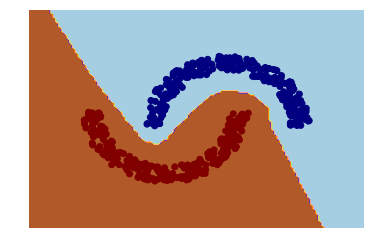

array([[250,   0],
       [  0, 250]])

In [14]:
y_pred_train = model.predict(x_train, batch_size=128)
y_pred_train = np.argmax(y_pred_train, axis=1)
score = model.evaluate(x_train, y_train_vec, batch_size=128)
print("The accuracy of the MLFFNN model on the training data:", score[1]*100,"%")

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# here "model" is your model's prediction (classification) function
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('off')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.jet)
plt.show()

#confusion Matrix
confusion_matrix(y_train, y_pred_train,labels=[0, 1])


300/300 [==============================] - 0s 37us/step
The accuracy of the MLFFNN model on the validation data: 100.0 %


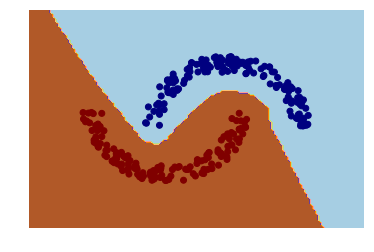

array([[150,   0],
       [  0, 150]])

In [18]:
y_pred_valid = model.predict(x_valid, batch_size=128)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
score = model.evaluate(x_valid, y_valid_vec, batch_size=128)
print("The accuracy of the MLFFNN model on the validation data:", score[1]*100,"%")

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# here "model" is your model's prediction (classification) function
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('off')

# Plot also the training points
plt.scatter(x_valid[:, 0], x_valid[:, 1], c=y_valid, cmap=plt.cm.jet)
plt.show()

#confusion Matrix
confusion_matrix(y_valid, y_pred_valid,labels=[0, 1])

200/200 [==============================] - 0s 42us/step
The accuracy of the MLFFNN model on the test data: 100.0 %


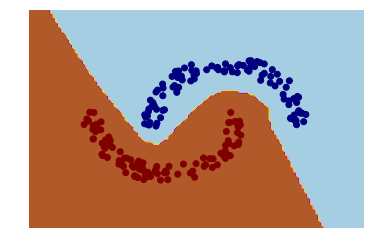

array([[100,   0],
       [  0, 100]])

In [17]:
y_pred_test = model.predict(x_test, batch_size=128)
y_pred_test = np.argmax(y_pred_test, axis=1)
score = model.evaluate(x_test, y_test_vec, batch_size=128)
print("The accuracy of the MLFFNN model on the test data:", score[1]*100,"%")

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# here "model" is your model's prediction (classification) function
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('off')

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.jet)
plt.show()

#confusion Matrix
confusion_matrix(y_test, y_pred_test,labels=[0, 1])